In [29]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from eplusparser.eplusparser import parse
from sklearn.preprocessing import StandardScaler

In [30]:
df = parse('../OpenStudio_Models/MediumOffice_2/run/eplusout.sql')

df.head()

VariableName Cooling:Electricity Electricity:Facility  \
KeyValue                                                
TimeIndex                                               
7                            0.0         6.200931e+07   
14                           0.0         6.200931e+07   
21                           0.0         6.200931e+07   
28                           0.0         6.200931e+07   
35                           0.0         6.200931e+07   

VariableName ExteriorLights:Electricity Fans:Electricity  Gas:Facility  \
KeyValue                                                                 
TimeIndex                                                                
7                            18840654.0              0.0  4.597009e+06   
14                           18840654.0              0.0  4.597009e+06   
21                           18840654.0              0.0  4.597009e+06   
28                           18840654.0              0.0  4.597009e+06   
35                           18840654.0              0.0  4.597009e+06   

VariableName Heating:Electricity Heating:Gas InteriorEquipment:Electricity  \
KeyValue                                                                     
TimeIndex                                                                    
7                            0.0         0.0                  3.448095e+07   
14                           0.0         0.0                  3.448095e+07   
21                           0.0         0.0                  3.448095e+07   
28                           0.0         0.0                  3.448095e+07   
35                           0.0         0.0                  3.448095e+07   

VariableName InteriorLights:Electricity  \
KeyValue                                  
TimeIndex                                 
7                          8.687704e+06   
14                         8.687704e+06   
21                         8.687704e+06   
28                         8.687704e+06   
35                         8.687704e+06   

VariableName                                  People Occupant Count  ...  \
KeyValue     CORE_BOTTOM ZN OFFICE WHOLEBUILDING - MD OFFICE PEOPLE  ...   
TimeIndex                                                            ...   
7                                                           0.0      ...   
14                                                          0.0      ...   
21                                                          0.0      ...   
28                                                          0.0      ...   
35                                                          0.0      ...   

VariableName Zone Thermostat Heating Setpoint Temperature  \
KeyValue                            PERIMETER_BOT_ZN_4 ZN   
TimeIndex                                                   
7                                                    15.6   
14                                                   15.6   
21                                                   15.6   
28                                                   15.6   
35                                                   15.6   

VariableName                                              \
KeyValue     PERIMETER_MID_ZN_1 ZN PERIMETER_MID_ZN_2 ZN   
TimeIndex                                                  
7                             15.6                  15.6   
14                            15.6                  15.6   
21                            15.6                  15.6   
28                            15.6                  15.6   
35                            15.6                  15.6   

VariableName                                              \
KeyValue     PERIMETER_MID_ZN_3 ZN PERIMETER_MID_ZN_4 ZN   
TimeIndex                                                  
7                             15.6                  15.6   
14                            15.6                  15.6   
21                            15.6                  15.6   
28                            15.6       

In [32]:
# Change this variable to control what columns are used

df_zone = df.copy()
df_sched = df_zone['Schedule Value'].filter(regex='OFFICEMEDIUM.*', axis=1)
del df_zone['Schedule Value']

df_zone.columns = df_zone.columns.get_level_values(0)
df_zone = df_zone.groupby(lambda x:x, axis=1).mean()

df_mean = df_zone.join(df_sched)
df_mean.head()
# print(f'Variables used: {set(df_mean.columns)}')

,Cooling:Electricity,Electricity:Facility,ExteriorLights:Electricity,Fans:Electricity,Gas:Facility,Heating:Electricity,Heating:Gas,InteriorEquipment:Electricity,InteriorLights:Electricity,People Occupant Count,...,OFFICEMEDIUM BLDG_SWH_SCH,OFFICEMEDIUM CLGSETP_SCH_NO_SETBACK,OFFICEMEDIUM ELEV_LIGHT_FAN_SCH_ADD_DF,OFFICEMEDIUM EXTERIOR_LIGHTING_SCHEDULE_A,OFFICEMEDIUM EXTERIOR_LIGHTING_SCHEDULE_B,OFFICEMEDIUM HTGSETP_SCH_PACU_VAV_BOT,OFFICEMEDIUM HVACOPERATIONSCHD,OFFICEMEDIUM INFIL_DOOR_OPENING_SCH,OFFICEMEDIUM INFIL_SCH_PNNL,OFFICEMEDIUM MINOA_MOTORIZEDDAMPER_SCHED
TimeIndex,,,,,,,,,,,,,,,,,,,,,
7,0.0,6.200931e+07,18840654.0,0.0,4.597009e+06,0.0,0.0,3.448095e+07,8.687704e+06,0.0,...,0.0,24.0,0.0,0.0,0.7,15.6,0.0,0.0,1.0,0.0
14,0.0,6.200931e+07,18840654.0,0.0,4.597009e+06,0.0,0.0,3.448095e+07,8.687704e+06,0.0,...,0.0,24.0,0.0,0.0,0.7,15.6,0.0,0.0,1.0,0.0
21,0.0,6.200931e+07,18840654.0,0.0,4.597009e+06,0.0,0.0,3.448095e+07,8.687704e+06,0.0,...,0.0,24.0,0.0,0.0,0.7,15.6,0.0,0.0,1.0,0.0
28,0.0,6.200931e+07,18840654.0,0.0,4.597009e+06,0.0,0.0,3.448095e+07,8.687704e+06,0.0,...,0.0,24.0,0.0,0.0,0.7,15.6,0.0,0.0,1.0,0.0
35,0.0,6.200931e+07,18840654.0,0.0,4.597009e+06,0.0,0.0,3.448095e+07,8.687704e+06,0.0,...,0.0,24.0,0.0,0.0,0.7,15.6,0.0,0.0,1.0,0.0


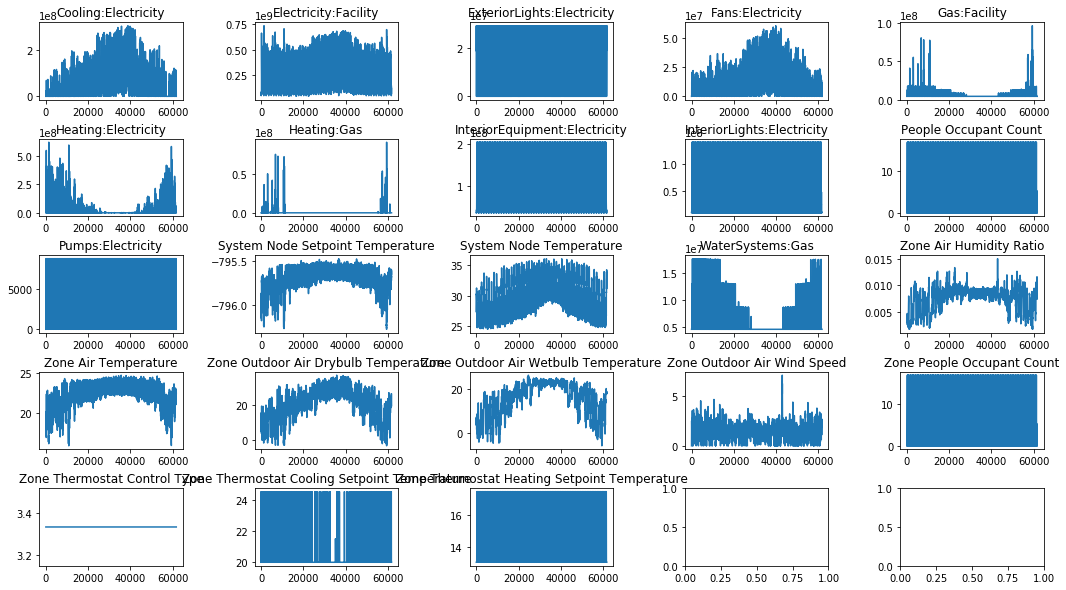

In [33]:
plt.rcParams["figure.figsize"] = (18,10)
plt.rcParams["figure.subplot.hspace"] = 0.5
plt.rcParams["figure.subplot.wspace"] = 0.5

_, axes = plt.subplots(5, 5)
for i, column in enumerate(df_zone):
    ax=axes[int(i/5)][i%5]
    ax.plot(df_zone[column])
    ax.set_title(column)

plt.show()

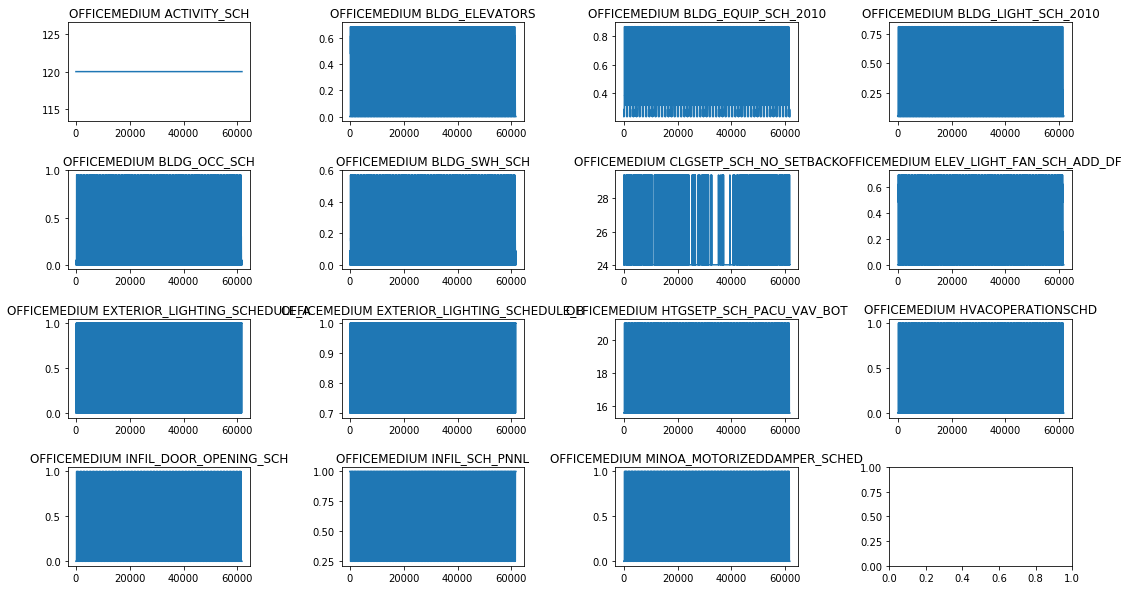

In [158]:
plt.rcParams["figure.figsize"] = (18,10)
plt.rcParams["figure.subplot.hspace"] = 0.5
plt.rcParams["figure.subplot.wspace"] = 0.5

_, axes = plt.subplots(4, 4)
for i, column in enumerate(df_sched):
    ax=axes[int(i/4)][i%4]
    ax.plot(df_sched[column])
    ax.set_title(column)

plt.show()

In [17]:
def plot_variable(varName, df):
    ax = plt.subplot(1,1,1)
    p1, = ax.plot(df[varName])
    ax.set_xlabel("Hour")
    ax.set_ylabel(varName)
    plt.show()
    
def scale_data(df, scaler):
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
plot_variable("")

In [18]:
# Let's normalize the entire dataframe
# Doing this over the entire data frame may not be the best but it's my first pass

standard_scaler = StandardScaler()
normalized_df = scale_data(df_mean, standard_scaler)
display(normalized_df.head())

,Cooling:Electricity,Electricity:Facility,ExteriorLights:Electricity,Fans:Electricity,Gas:Facility,Heating:Electricity,Heating:Gas,InteriorEquipment:Electricity,InteriorLights:Electricity,People Occupant Count,...,OFFICEMEDIUM BLDG_SWH_SCH,OFFICEMEDIUM CLGSETP_SCH_NO_SETBACK,OFFICEMEDIUM ELEV_LIGHT_FAN_SCH_ADD_DF,OFFICEMEDIUM EXTERIOR_LIGHTING_SCHEDULE_A,OFFICEMEDIUM EXTERIOR_LIGHTING_SCHEDULE_B,OFFICEMEDIUM HTGSETP_SCH_PACU_VAV_BOT,OFFICEMEDIUM HVACOPERATIONSCHD,OFFICEMEDIUM INFIL_DOOR_OPENING_SCH,OFFICEMEDIUM INFIL_SCH_PNNL,OFFICEMEDIUM MINOA_MOTORIZEDDAMPER_SCHED
0,-0.957288,-1.143706,0.57219,-1.187378,-0.226263,-0.339284,-0.09255,-0.923083,-0.796463,-0.753399,...,-0.932576,-0.176688,-0.755027,-1.732051,-1.732051,-1.106499,-1.096914,-0.472368,1.096914,-1.02123
1,-0.957288,-1.143706,0.57219,-1.187378,-0.226263,-0.339284,-0.09255,-0.923083,-0.796463,-0.753399,...,-0.932576,-0.176688,-0.755027,-1.732051,-1.732051,-1.106499,-1.096914,-0.472368,1.096914,-1.02123
2,-0.957288,-1.143706,0.57219,-1.187378,-0.226263,-0.339284,-0.09255,-0.923083,-0.796463,-0.753399,...,-0.932576,-0.176688,-0.755027,-1.732051,-1.732051,-1.106499,-1.096914,-0.472368,1.096914,-1.02123
3,-0.957288,-1.143706,0.57219,-1.187378,-0.226263,-0.339284,-0.09255,-0.923083,-0.796463,-0.753399,...,-0.932576,-0.176688,-0.755027,-1.732051,-1.732051,-1.106499,-1.096914,-0.472368,1.096914,-1.02123
4,-0.957288,-1.143706,0.57219,-1.187378,-0.226263,-0.339284,-0.09255,-0.923083,-0.796463,-0.753399,...,-0.932576,-0.176688,-0.755027,-1.732051,-1.732051,-1.106499,-1.096914,-0.472368,1.096914,-1.02123


In [23]:
from sklearn.linear_model import LassoCV, LassoLarsCV, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split

def rmse_cv(model, X, y):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


X = normalized_df.drop([("Electricity:Facility"), ("Gas:Facility")], axis=1)
X = X.loc[:,~X.columns.str.endswith(':Electricity')]
X = X.loc[:,~X.columns.str.endswith(':Gas')]

y = normalized_df["Electricity:Facility"]

In [24]:
model_lasso = LassoCV(cv=5).fit(X, y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
rmse_cv(model_lasso, X, y).mean()

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.3617307924247936

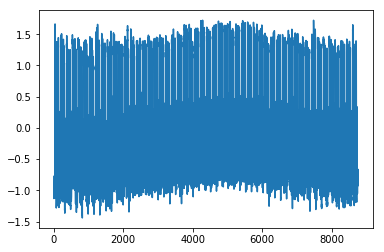

In [26]:
# Predictions on test dataset
# print("RMSE Error: {0}".format(rmse_cv(model_lasso).mean()))
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(X.index.values, model_lasso.predict(X))

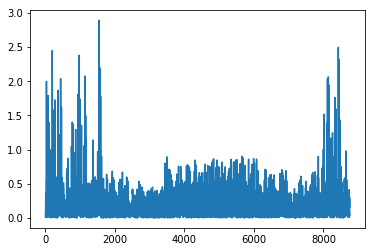

In [27]:
# Error in testing data
plt.plot(X.index.values, abs(y - model_lasso.predict(X)))

Lasso picked 23 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Coefficients in the Lasso Model')

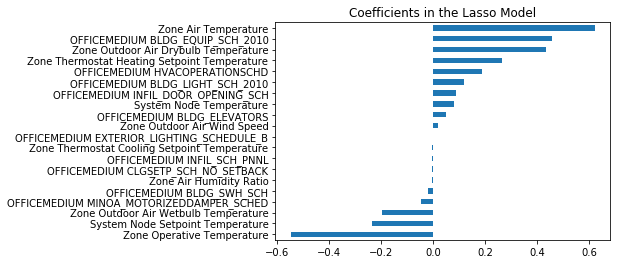

In [28]:
coef = pd.Series(model_lasso.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")